In [1]:
pip install pyvrp

     ---------------------------------------- 2.4/2.4 MB 83.9 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


PyVRP v0.9.1

Solving an instance with:
    1 depot
    16 clients
    4 vehicles (1 vehicle type)

                  |       Feasible        |      Infeasible
    Iters    Time |   #      Avg     Best |   #      Avg     Best
H     500      0s |  55     6608     6608 |  61     6316     5114
     1000      1s |  34     6608     6608 |  50     7128     6314

Search terminated in 1.00s after 1017 iterations.
Best-found solution has cost 6608.

Solution results
    # routes: 4
   # clients: 16
   objective: 6608
    distance: 6208
    duration: 0
# iterations: 1017
    run-time: 1.00 seconds

[<pyvrp._pyvrp.Depot object at 0x00000134E3C47D30>, <pyvrp._pyvrp.Client object at 0x00000134E3C445F0>, <pyvrp._pyvrp.Client object at 0x00000134E3C477F0>, <pyvrp._pyvrp.Client object at 0x00000134E3C44F70>, <pyvrp._pyvrp.Client object at 0x00000134E3C463F0>, <pyvrp._pyvrp.Client object at 0x00000134E3C46CF0>, <pyvrp._pyvrp.Client object at 0x00000134E0D0AF30>, <pyvrp._pyvrp.Client object at 0x0000013

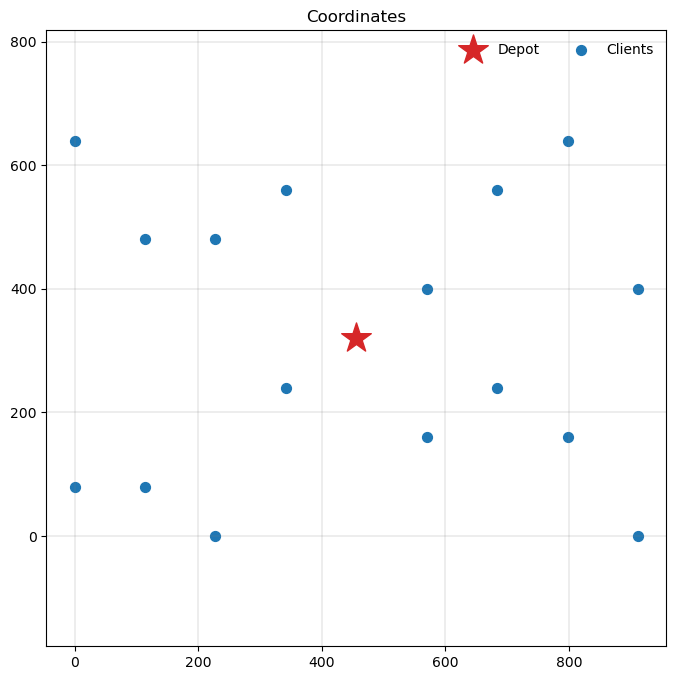

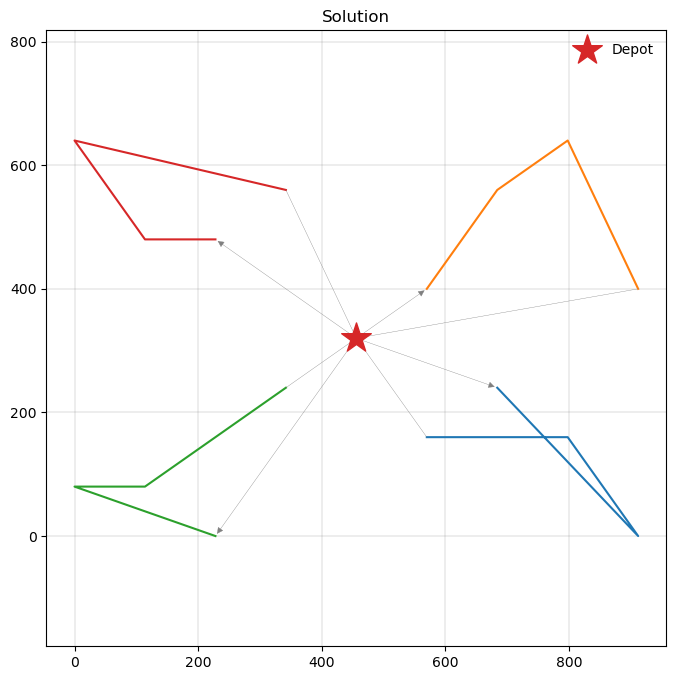

In [10]:
#求解cvrp问题
from pyvrp import Model
import matplotlib.pyplot as plt
from pyvrp.plotting import plot_coordinates
from pyvrp.stop import MaxRuntime
coords=[
    (456, 320),  # location 0 
    (228, 0),    # location 1
    (912, 0),    # location 2
    (0, 80),     # location 3
    (114, 80),   # location 4
    (570, 160),  # location 5
    (798, 160),  # location 6
    (342, 240),  # location 7
    (684, 240),  # location 8
    (570, 400),  # location 9
    (912, 400),  # location 10
    (114, 480),  # location 11
    (228, 480),  # location 12
    (342, 560),  # location 13
    (684, 560),  # location 14
    (0, 640),    # location 15
    (798, 640),  # location 16
] #各地坐标
demands=[0,1,1,2,4,2,4,8,8,1,2,1,2,4,4,8,8] #各地需求
m=Model()
m.add_vehicle_type(num_available=4,
                   capacity=15,
                   fixed_cost=100,
                   tw_early=0,
                   tw_late=100000) #加入车辆属性
depot=m.add_depot(x=coords[0][0],y=coords[0][1]) #加入起点
clients=[
    m.add_client(x=coords[i][0],y=coords[i][1],delivery=demands[i]) 
    for i in range(1,len(COORDS))
] #加入客户点
locations=[depot,*clients] #*将列表展开，获得所有点
for frm in locations:
    for to in locations:
        distance=abs(frm.x-to.x)+abs(frm.y-to.y)
        m.add_edge(frm,to,distance=distance) #加入路段
        
#画图
_,ax=plt.subplots(figsize=(8,8))
plot_coordinates(m.data(),ax=ax)
res=m.solve(stop=MaxRuntime(1)) #模型求解，程序运行时间设置成5秒
print(locations)
print(res)

#结果展示
from pyvrp.plotting import plot_solution
_,ax=plt.subplots(figsize=(8,8))
plot_solution(res.best,m.data(),ax=ax)

Solution results
    # routes: 6
   # clients: 17
   objective: 380
    distance: 380
    duration: 414
# iterations: 1755
    run-time: 2.00 seconds

Routes
------
Route #1: 9 17 13 
Route #2: 7 11 
Route #3: 14 12 8 
Route #4: 15 3 4 
Route #5: 6 2 10 
Route #6: 1 5 16 



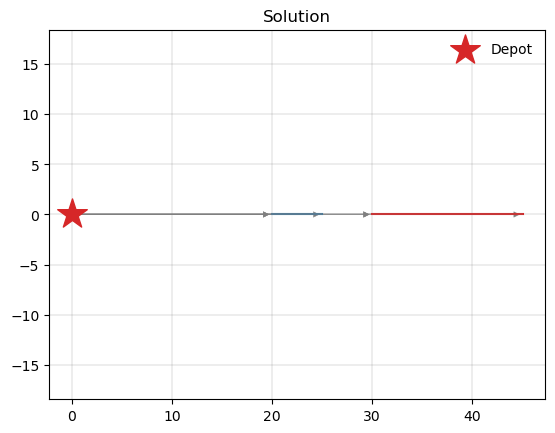

In [13]:
#求解vrptw问题
x_coord=[0,20,25,30,45]
time_windows=[(0,1000),(100,1002),(200,1005),(180,1008),(180,1003),(90,500),                
              (95,1000),(90,400),(95,1000),(90,300),(90,1600),(90,150),                
              (10,500),(50,100),(70,800),(190,1500),(100,1005)] 
service_time=[2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2]
demands=[1,1,1,1,2,2,2,1,1,1,2,1,2,2,2,1,1]
station=[1,2,3,4,1,2,3,4,1,2,3,4,2,4,3,1,2]

from pyvrp.stop import MaxRuntime
from pyvrp.plotting import plot_solution
from pyvrp import Model
m=Model()
m.add_vehicle_type(num_available=20,capacity=4)
depot=m.add_depot(x=x_coord[0],y=0) #(tw_early=0,tw_late=9999)
clients=[m.add_client(x=x_coord[station[i]],y=0,delivery=demands[i],service_duration=2,\
                     tw_early=time_windows[i][0],tw_late=time_windows[i][1]) for i in range(len(demands))]
locations=[depot]+clients
for frm in locations:
    for to in locations:
        m.add_edge(frm,to,distance=abs(frm.x-to.x),duration=abs(frm.x-to.x))
res=m.solve(stop=MaxRuntime(2),display=False)
print(res)
f,ax=plt.subplots()
plot_solution(res.best,m.data(),ax=ax)